## Ejercicio 1

El fichero **titanic.csv** contiene información sobre los pasajeros del Titanic. 

Escribir un programa con los siguientes requisitos:

1. Generar un DataFrame con los datos del fichero.
2. Mostrar por pantalla las dimensiones del DataFrame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, las 10 primeras filas y las 10 últimas filas
3. Mostrar por pantalla los datos del pasajero con identificador 148.
4. Mostrar por pantalla las filas pares del DataFrame.
5. Mostrar por pantalla los nombres de las personas que iban en primera clase ordenadas alfabéticamente.
6. Mostrar por pantalla el porcentaje de personas que sobrevivieron y murieron.
7. Mostrar por pantalla el porcentaje de personas que sobrevivieron en cada clase.
8. Eliminar del DataFrame los pasajeros con edad desconocida.
9. Mostrar por pantalla la edad media de las mujeres que viajaban en cada clase.
10. Añadir una nueva columna booleana para ver si el pasajero era menor de edad o no.
11. Mostrar por pantalla el porcentaje de menores y mayores de edad que sobrevivieron en cada clase.

In [3]:
import os
import pandas as pd
import io
from google.colab import files

In [4]:
# Cargando data
uploaded = files.upload()

Saving fallecidos_covid.xlsx to fallecidos_covid.xlsx
Saving PovertyEstimates.csv to PovertyEstimates.csv
Saving primary_results.csv to primary_results.csv
Saving primary_results.xlsx to primary_results.xlsx
Saving titanic.csv to titanic.csv


In [6]:
os.listdir()

['.config',
 'titanic.csv',
 'primary_results.xlsx',
 'primary_results.csv',
 'fallecidos_covid.xlsx',
 'PovertyEstimates.csv',
 'sample_data']

In [7]:
df = pd.read_csv('titanic.csv')

### 2.Mostrar por pantalla las dimensiones del DataFrame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, las 10 primeras filas y las 10 últimas filas

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### 3. Mostrar por pantalla los datos del pasajero con identificador 148

In [15]:
cond = (df.PassengerId == 148)

df[cond]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S


### 4. Mostrar por pantalla las filas pares del DataFrame.

In [16]:
df[::2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 5.Mostrar por pantalla los nombres de las personas que iban en primera clase ordenadas alfabéticamente.

In [18]:
df_firstClass = df[df.Pclass == 1]

In [61]:
df_firstClass.Name.sort_values(ascending=True) #.head(3)

730                      Allen, Miss. Elisabeth Walton
305                     Allison, Master. Hudson Trevor
297                       Allison, Miss. Helen Loraine
498    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
460                                Anderson, Mr. Harry
                            ...                       
155                        Williams, Mr. Charles Duane
351             Williams-Lambert, Mr. Fletcher Fellows
55                                   Woolner, Mr. Hugh
555                                 Wright, Mr. George
325                           Young, Miss. Marie Grice
Name: Name, Length: 216, dtype: object

### 6. Mostrar por pantalla el porcentaje de personas que sobrevivieron y murieron.

In [26]:
df.groupby('Survived')['SibSp'].mean()

Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

### 7. Mostrar por pantalla el porcentaje de personas que sobrevivieron en cada clase.

In [39]:
for clase in df.Pclass.unique():

  df_clase = df[df.Pclass == clase]
  
  total = df_clase['PassengerId'].count()
  sobrevivieron = df_clase[(df_clase.Survived == 1)]['PassengerId'].count()

  print("El porcentaje de sobrevivientes para la clase {} es : {}".format(clase, sobrevivieron/total))


El porcentaje de sobrevivientes para la clase 3 es : 0.24236252545824846
El porcentaje de sobrevivientes para la clase 1 es : 0.6296296296296297
El porcentaje de sobrevivientes para la clase 2 es : 0.47282608695652173


### 8. Eliminar del DataFrame los pasajeros con edad desconocida.

In [48]:
df.dropna(subset=["Age"], inplace=True)

In [50]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [49]:
df[df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [51]:
df.shape

(714, 12)

### 10. Añadir una nueva columna booleana para ver si el pasajero era menor de edad o no.

In [52]:
def is_legal(edad: int):
  if edad >=18:
    return True
  return False

In [55]:
is_legal(20)

True

In [56]:
df['EsMayorEdad'] = df.Age.apply(is_legal)

In [57]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EsMayorEdad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,True
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True


In [58]:
df[df.EsMayorEdad == False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EsMayorEdad
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,False
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,False
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,False
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,False
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,False


## Ejercicio 2

El fichero **titanic.csv** contiene información sobre los pasajeros del Titanic. 

Crear un dataframe con Pandas y a partir de él generar los siguientes diagramas.

1. Diagrama de sectores(circular) con los fallecidos y supervivientes.
2. Histograma con las edades.
3. Diagrama de barras con el número de personas en cada clase.
4. Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.
5. Diagrama de barras con el número de personas fallecidas y supervivientes acumuladas en cada clase

Ayudarse de la [documentacion](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) para agregar mayor detalle a su gráfico.


In [63]:
import pandas as pd 
import matplotlib.pyplot as plt

In [67]:
# leyendo df
df = pd.read_csv('titanic.csv')

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Iniciando con los gráficos

In [70]:
%matplotlib inline

### 1.Diagrama de sectores(circular) con los fallecidos y supervivientes.

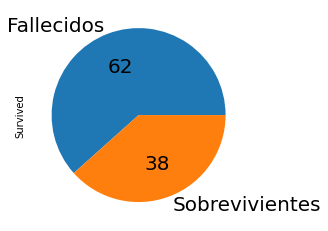

In [77]:
df.Survived.value_counts().plot.pie(
    
    labels=["Fallecidos", "Sobrevivientes"],
    autopct="%.0f",
    fontsize=20
    )

### 2.Histograma con las edades.

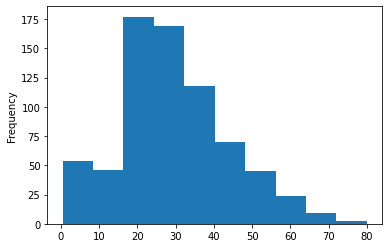

In [78]:
df.Age.plot.hist()

## Exportacion de Google Colab

In [ ]:
df.to_excel('')

In [79]:
os.listdir()

['.config',
 'titanic.csv',
 'primary_results.xlsx',
 'primary_results.csv',
 'fallecidos_covid.xlsx',
 'PovertyEstimates.csv',
 'sample_data']

In [80]:
if not os.path.isdir('./out'):
  os.mkdir('./out')

In [84]:
df.to_excel('./out/titanic_procesado.xlsx', sheet_name='data', index=False)

In [85]:
os.listdir('out')

['titanic_procesado2.xlsx', 'titanic_procesado.xlsx']

In [83]:
files.download('./out/titanic_procesado.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
files.download('newzip.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
import zipfile

In [90]:
newZip = zipfile.ZipFile('newzip.zip', 'w')

for file in os.listdir('out'):
    if file.split('.')[-1] not in ['zip']:
        print(file)
        newZip.write(f'./out/{file}', compress_type=zipfile.ZIP_DEFLATED)
newZip.close()

titanic_procesado2.xlsx
titanic_procesado.xlsx


In [92]:
os.listdir()

['.config',
 'titanic.csv',
 'primary_results.xlsx',
 'primary_results.csv',
 'out',
 'newzip.zip',
 'fallecidos_covid.xlsx',
 'PovertyEstimates.csv',
 'sample_data']